# Web App Development basics


## **Single page applications**

A single page application is a website or web application that dynamically rewrites a current web page with new data from the web server, instead of the default method of a web browser loading entire new pages.

A mature & useful web app development framework for python: [Dash](https://dash.plotly.com/?_gl=1*exlz93*_ga*MTg2MjUzNDkxMi4xNjgwMDUzNzY0*_ga_6G7EE0JNSC*MTY4MDA1Mzc2My4xLjEuMTY4MDA1Mzg2My4wLjAuMA..)



---



### Intro - Why Dash?

- DASH enables users to rapidly create **interactive** dashboards and data-driven web applications using regular Python.
- Rendered on the browser, making it a cross-platform solution.
- Uses Flask API, React.js and Plotly.js as its backbone.           
- DASH is “React for Python”: Python is the only other tech stack one needs to know.

- Advantages: 
    - Easy to use.
    - Quick app development.
    - Suitable for data scientists, who may not be very familiar with web development.
    - Possible, but not mandatory to include HTML and CSS elements to elevate the design.

---------------------------------------------------------------

### What's in store for this session?

- Intro to Dash
- Intro to Plotly
- Dash app definition
- Dash building blocks
    - Layout
    - Callbacks
- Dash Core Components (dcc)
- Dash Mantine Components (dmc) : A frontend component library
---

Dependencies Not in colab and need to be manually installed
*   jupyter_dash
*   [dash_mantine_commponents](https://www.dash-mantine-components.com/)


In [ ]:
!pip install jupyter_dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00


In [ ]:
!pip install dash_mantine_components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.9/496.9 KB 9.3 MB/s eta 0:00:00


## Intro to Plotly Graphing Library [plotly](https://plotly.com/graphing-libraries/)


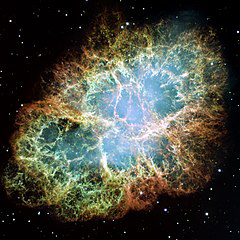

In [ ]:
import plotly.express as px
from skimage import io
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg')
fig = px.imshow(img)
fig.show()

## Dash App development Basics

#### Imports

In [ ]:
# Dash
import dash
from dash import Input, Output, State, dcc, html, callback
from jupyter_dash import JupyterDash
import dash_mantine_components as dmc
from dash.exceptions import PreventUpdate

# Scientific and data analysis libraries
import pandas as pd
import numpy as np
import xarray as xr
import scipy
from scipy.interpolate import RectBivariateSpline as RBVS

# Plotting
import plotly.express as px
import plotly.graph_objects as go

### Dash app definition

In [ ]:
# app = dash.Dash(
#         name = __name__,
#         suppress_callback_exceptions=True,
#     )

In [ ]:
app = JupyterDash(
        name = __name__,
        suppress_callback_exceptions=True,
    )

### Dash Building Block 1 - Layout

- Describes the look and feel of the app. Composed of a tree of components.
- Defines elements of the page, and their colour, size, position, orientation etc.
- Dash includes HTML components like Headings, text, images, etc. However, not all components are HTML.
- Other interactive elements like graphs, dropdowns, radio buttons, sliders, etc., can be defined through *dash_core_components (dcc)* and *dash_mantine_components (dmc)*.

In [ ]:
app.layout = html.Div([     
        dmc.Title(children="Hello World!", id = 'title-text'),
        dmc.Space(h=20),
        dmc.Button("Button", id = 'print-button'),
        dmc.Space(h=20),
        dmc.Select(label = "Select Data", id = 'data-select', value='', data=["alpha", "beta"]),
        dcc.Graph(id='graph')         
    ])

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True,mode='inline')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

Key properties within each component:
- **id** (string): Allows callbacks to identify the component. IDs should be unique for each component.
- **children**: Can be a string, number, another component, or a list of components.
- **value**: Current value of the element.
- **data / options**: Possible values that the component can take.
Each component type can have their own specific properties. See individual help pages when using them.

---------------------------------------

### Dash Building Block 2 - Callbacks

Callbacks are what provide interactivity within a dash app.
When the user selects or modifies the data selection, the relevant callback activates an appropriate response.

- Basic structure of callbacks
    - Input: Components which will trigger the callback function.
    - Output: Components which will be updated by the callback function.
    - State: Components whose specific property will be accessible to the callback function, but which will not trigger the callback.
- Each of the components above is defined by:
    - “id” of the component to input / output
    - “property” of the component to input / output
- Callback function: The logic to be used to update the components specified in the “Outputs” of the callback. 

Things to note:
- Each callback input should be mentioned as an argument of the callback function.


In [ ]:
# Dash
import dash
from dash import Input, Output, State, dcc, html, callback
from jupyter_dash import JupyterDash
import dash_mantine_components as dmc
from dash.exceptions import PreventUpdate

# Scientific and data analysis libraries
import pandas as pd
import numpy as np
import xarray as xr
import scipy
from scipy.interpolate import RectBivariateSpline as RBVS

# Plotting
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
app = JupyterDash(
        name = __name__,
        suppress_callback_exceptions=True,
    )

In [ ]:
app.layout = html.Div([     
        dmc.Title(children="Hello World!", id = 'title-text'),
        dmc.Space(h=20),
        dmc.Button("Button", id = 'print-button'),
        dmc.Space(h=20),
        dmc.Select(label = "Select Data", id = 'data-select', value='', data=["alpha", "beta"]),
        dmc.Title(id='some_text')       
    ])

In [ ]:
@callback(
    output = dict(
        some_text = Output('some_text', 'children')
    ),
    inputs = dict(
        selected_value = Input('data-select', 'value')
    )
)
def handle_callback(selected_value):
    return dict(some_text = selected_value)

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True,mode='inline')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

In [ ]:
# Dash
import dash
from dash import Input, Output, State, dcc, html, callback
from jupyter_dash import JupyterDash
import dash_mantine_components as dmc
from dash.exceptions import PreventUpdate

# Scientific and data analysis libraries
import pandas as pd
import numpy as np
import xarray as xr
import scipy
from scipy.interpolate import RectBivariateSpline as RBVS

# Plotting
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
app = JupyterDash(
        name = __name__,
        suppress_callback_exceptions=True,
    )

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
])

@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
                     size="pop", color="continent", hover_name="country",
                     log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig

   

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True,mode='inline')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

### Dash Building Block 3 - Interactive Graphing

In [ ]:
# Dash
import dash
from dash import Input, Output, State, dcc, html, callback
from jupyter_dash import JupyterDash
import dash_mantine_components as dmc
from dash.exceptions import PreventUpdate

# Scientific and data analysis libraries
import pandas as pd
import numpy as np
import xarray as xr
import scipy
from scipy.interpolate import RectBivariateSpline as RBVS

# Plotting
import plotly.express as px
import plotly.graph_objects as go

import json

In [ ]:
app = JupyterDash(
        name = __name__,
        suppress_callback_exceptions=True,
    )

In [ ]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

df = pd.DataFrame({
    "x": [1,2,1,2],
    "y": [1,2,3,4],
    "customdata": [1,2,3,4],
    "fruit": ["apple", "apple", "orange", "orange"]
})

fig = px.scatter(df, x="x", y="y", color="fruit", custom_data=["customdata"])

fig.update_layout(clickmode='event+select')

fig.update_traces(marker_size=20)

In [ ]:
app.layout = html.Div([
    dcc.Graph(
        id='basic-interactions',
        figure=fig
    ),

    html.Div(className='row', children=[
        html.Div([
            dcc.Markdown("""
                **Hover Data**

                Mouse over values in the graph.
            """),
            html.Pre(id='hover-data', style=styles['pre'])
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Click Data**

                Click on points in the graph.
            """),
            html.Pre(id='click-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Selection Data**

                Choose the lasso or rectangle tool in the graph's menu
                bar and then select points in the graph.

                Note that if `layout.clickmode = 'event+select'`, selection data also
                accumulates (or un-accumulates) selected data if you hold down the shift
                button while clicking.
            """),
            html.Pre(id='selected-data', style=styles['pre']),
        ], className='three columns'),

        html.Div([
            dcc.Markdown("""
                **Zoom and Relayout Data**

                Click and drag on the graph to zoom or click on the zoom
                buttons in the graph's menu bar.
                Clicking on legend items will also fire
                this event.
            """),
            html.Pre(id='relayout-data', style=styles['pre']),
        ], className='three columns')
    ])
])


@app.callback(
    Output('hover-data', 'children'),
    Input('basic-interactions', 'hoverData'))
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@app.callback(
    Output('click-data', 'children'),
    Input('basic-interactions', 'clickData'))
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)


@app.callback(
    Output('selected-data', 'children'),
    Input('basic-interactions', 'selectedData'))
def display_selected_data(selectedData):
    return json.dumps(selectedData, indent=2)


@app.callback(
    Output('relayout-data', 'children'),
    Input('basic-interactions', 'relayoutData'))
def display_relayout_data(relayoutData):
    return json.dumps(relayoutData, indent=2)

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True,mode='inline')

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



<IPython.core.display.Javascript object>

### Dash Building Block 4 - Components

# Interactive Seismic Visualization App